In [1]:
import numpy as np
import cdcgan_models
import cdcgan_utils

from scipy import interpolate
from IPython.display import Image

import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline

c:\users\vecse\anaconda3\envs\kaggle\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Create models & load weights

In [2]:
generator = cdcgan_models.generator_model()

In [3]:
generator.load_weights("../models/weights/generator.h5")

In [4]:
discriminator = cdcgan_models.discriminator_model()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
discriminator.load_weights("../models/weights/discriminator.h5")

## Generate test images

In [6]:
label_to_generate = 6
nb_of_images = 3

noise = cdcgan_utils.generate_noise((nb_of_images, 100))
label_embeddings = cdcgan_utils.generate_condition_embedding(label_to_generate, nb_of_images)

In [7]:
generated_images = generator.predict([noise, label_embeddings])
generated_images = np.squeeze(generated_images, axis=3)

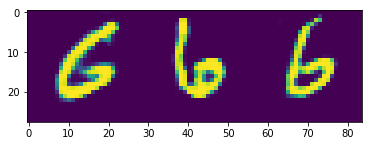

In [8]:
plt.imshow(np.hstack(generated_images));

## Interpolation

In [20]:
steps = 100
label_1 = 2
label_2 = 4

fixed_noise = cdcgan_utils.generate_noise((1, 100))

label_embedding_1 = cdcgan_utils.generate_condition_embedding(label_1, 1)
label_embedding_2 = cdcgan_utils.generate_condition_embedding(label_2, 1)

In [21]:
z = np.empty((steps, 100))

for i, alpha in enumerate(np.linspace(start=0.0, stop=1.0, num=steps)):
    z[i] = alpha * label_embedding_2 + (1.0 - alpha) * label_embedding_1

In [22]:
fixed_noise = np.vstack([fixed_noise] * steps)

In [23]:
generated_images = generator.predict([fixed_noise, z])
generated_images = np.squeeze(generated_images, 3)

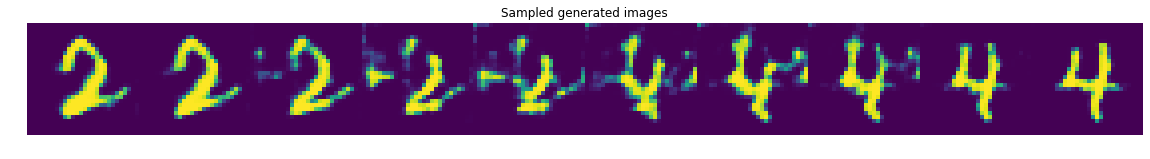

In [24]:
plt.figure(figsize=(20, 10))
plt.imshow(np.hstack(generated_images[::10]))
plt.title("Sampled generated images")
plt.axis("off");

### Creating animation

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
image_plt = ax.imshow(generated_images[0])
fig.tight_layout()
plt.close()

def animation_update(step):
    image_plt.set_data(generated_images[step])
    return image_plt,

anim = animation.FuncAnimation(fig, animation_update, frames=len(generated_images), interval=100, blit=True, repeat=True)

In [26]:
animation_video_file_path = "../art/interpolation.mp4"
animation_gif_file_path = "../art/interpolation.gif"

In [27]:
anim.save(animation_video_file_path, writer="ffmpeg", fps=24)

In [28]:
cdcgan_utils.convert_video_to_gif(animation_video_file_path, animation_gif_file_path, fps=24)

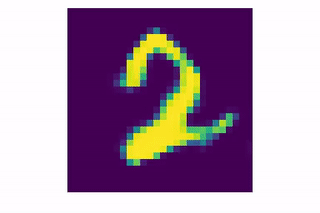

In [29]:
Image(animation_gif_file_path)